In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp, feature_selection as fs, model_selection as ms
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,\
ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,\
GradientBoostingRegressor,VotingClassifier,VotingRegressor
from sklearn import metrics as mt

In [5]:
df = pd.read_csv('Datasets/sonar.all-data',header=None)

In [6]:
array = df.values
x = array[:,0:60]
y = array[:,60]

In [36]:
df.shape

(208, 61)

In [37]:
df.groupby(60).size()

60
M    111
R     97
dtype: int64

In [38]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [39]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [42]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

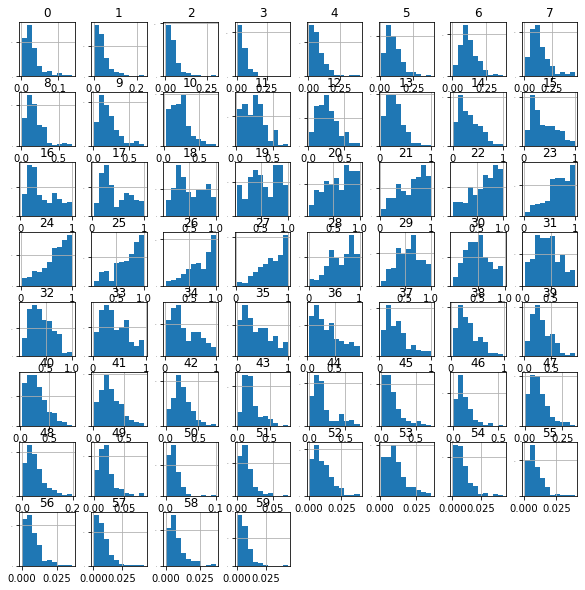

In [52]:
df.hist(sharex=False,sharey=False,ylabelsize=1,figsize=(10,10))
plt.show()

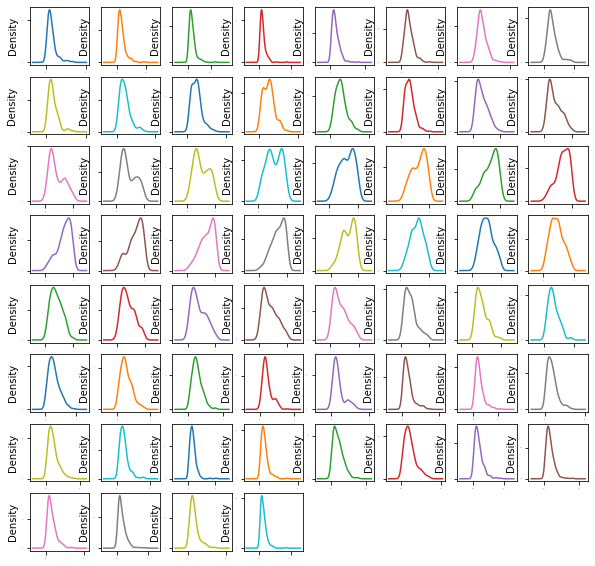

In [50]:
df.plot(kind='density',subplots=True,layout=(8,8),legend=False,sharex=False,fontsize=1,figsize=(10,10))
plt.show()

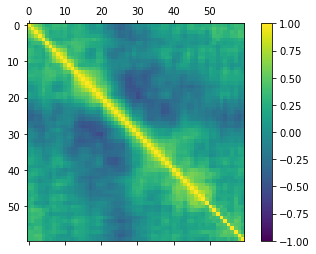

In [53]:
fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(df.corr(),vmin=-1,vmax=1)

fig.colorbar(cax)

plt.show()

In [7]:
xtrain,xvalidation,ytrain,yvalidation = ms.train_test_split(x,y,test_size=0.2,random_state=7)

In [58]:
models = []
models.append(('LogR',LogisticRegression(max_iter=100)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [61]:
results = []
names = []
for name,model in models:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_result.mean(),cv_result.std()))

LogR: 0.769485 (0.100510)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
DT: 0.700000 (0.093821)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


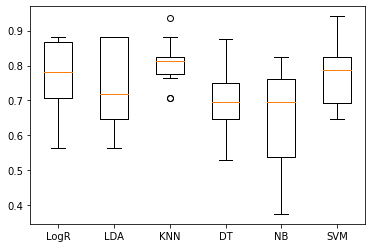

In [62]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.boxplot(results)

ax.set_xticklabels(names)

plt.show()

In [4]:
pipeline = []
pipeline.append((('scaledLogR'),Pipeline([('scaler',pp.StandardScaler()),('LogR',LogisticRegression(max_iter=200))])))
pipeline.append((('scaledLDA'),Pipeline([('scaler',pp.StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipeline.append((('scaledKNN'),Pipeline([('scaler',pp.StandardScaler()),('KNN',KNeighborsClassifier())])))
pipeline.append((('scaledDT'),Pipeline([('scaler',pp.StandardScaler()),('DT',DecisionTreeClassifier())])))
pipeline.append((('scaledNB'),Pipeline([('scaler',pp.StandardScaler()),('NB',GaussianNB())])))
pipeline.append((('scaledSVM'),Pipeline([('scaler',pp.StandardScaler()),('SVM',SVC())])))

In [11]:
results = []
names = []

for name,model in pipeline:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_result.mean(),cv_result.std()))

scaledLogR: 0.740441 (0.094668)
scaledLDA: 0.746324 (0.117854)
scaledKNN: 0.825735 (0.054511)
scaledDT: 0.729412 (0.089092)
scaledNB: 0.648897 (0.141868)
scaledSVM: 0.836397 (0.088697)


6

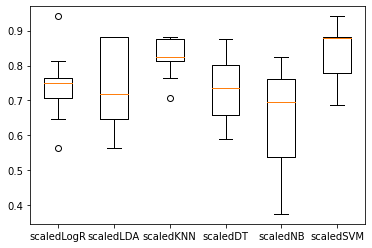

In [16]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.boxplot(results)

ax.set_xticklabels(names)

plt.show()

In [19]:
scaler = pp.StandardScaler().fit(xtrain)
rescaledx = scaler.transform(xtrain)

model = KNeighborsClassifier()

k_vals = [x for x in range(1,22,2)]

params = dict(n_neighbors=k_vals)

kfold = ms.KFold(n_splits=10)

grid = ms.GridSearchCV(model,param_grid=params,cv=kfold,scoring='accuracy')

In [20]:
grid.fit(rescaledx,ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             scoring='accuracy')

In [25]:
'best: %f using %s' % (grid.best_score_,grid.best_estimator_)

'best: 0.850000 using KNeighborsClassifier(n_neighbors=1)'

In [26]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

In [27]:
for mean,std,param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


In [28]:
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',pp.StandardScaler()),('AB',AdaBoostClassifier())])))
ensembles.append(('ScaledG',Pipeline([('Scaler',pp.StandardScaler()),('Gradient',GradientBoostingClassifier())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',pp.StandardScaler()),('RF',RandomForestClassifier())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',pp.StandardScaler()),('ET',ExtraTreesClassifier())])))

In [30]:
results = []
names = []
for name,model in ensembles:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_result.mean(),cv_result.std()))

ScaledAB: 0.813971 (0.066017)
ScaledG: 0.811397 (0.131780)
ScaledRF: 0.824632 (0.069407)
ScaledET: 0.872059 (0.071058)


In [32]:
scaler = pp.StandardScaler().fit(xtrain)
rescaledx = scaler.transform(xtrain)

model = ExtraTreesClassifier(random_state=7)

n_ests = np.arange(50,450,50)

params = dict(n_estimators=n_ests)

grid = ms.GridSearchCV(model,param_grid=params,cv=kfold,scoring='accuracy')

In [33]:
grid.fit(rescaledx,ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=7),
             param_grid={'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400])},
             scoring='accuracy')

In [34]:
'best: %f using %s'%(grid.best_score_,grid.best_params_)



"best: 0.884191 using {'n_estimators': 400}"

In [35]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean,std,param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

0.854412 (0.051423) with: {'n_estimators': 50}
0.853676 (0.080157) with: {'n_estimators': 100}
0.878309 (0.087194) with: {'n_estimators': 150}
0.878309 (0.082593) with: {'n_estimators': 200}
0.872059 (0.089419) with: {'n_estimators': 250}
0.872059 (0.089419) with: {'n_estimators': 300}
0.872059 (0.089419) with: {'n_estimators': 350}
0.884191 (0.088728) with: {'n_estimators': 400}


# our final model will be extratrees classifier which perform best with scoring of 0.88

In [38]:
scaler = pp.StandardScaler().fit(xtrain)
rescaledx = scaler.transform(xtrain)

In [39]:
model = ExtraTreesClassifier(n_estimators=grid.best_params_['n_estimators'],random_state=7)

In [40]:
model.fit(rescaledx,ytrain)

ExtraTreesClassifier(n_estimators=400, random_state=7)

In [41]:
rescaledxval = scaler.transform(xvalidation)

In [42]:
yprediction = model.predict(rescaledxval)

In [43]:
mt.accuracy_score(yvalidation,yprediction)

0.8809523809523809

In [44]:
print(mt.classification_report(yvalidation,yprediction))

              precision    recall  f1-score   support

           M       0.89      0.93      0.91        27
           R       0.86      0.80      0.83        15

    accuracy                           0.88        42
   macro avg       0.88      0.86      0.87        42
weighted avg       0.88      0.88      0.88        42



In [45]:
mt.confusion_matrix(yvalidation,yprediction)

array([[25,  2],
       [ 3, 12]], dtype=int64)

In [46]:
ypredprob = model.predict_proba(rescaledxval)

In [53]:
fpr,tpr,th = mt.roc_curve(yvalidation,ypredprob[:,1],pos_label='R')

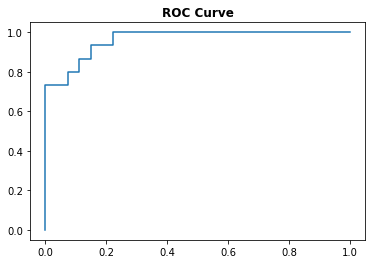

In [57]:
plt.plot(fpr,tpr)
plt.title('ROC Curve',fontweight='bold')
plt.show()